[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rycroft-group/math513/blob/main/1_svd/image_denoising.ipynb)

# Image denoising using SVD

This notebook was created by Jovana Andrejevic as part of the [Harvard AM205 Group Activity "SVD for image processing"](https://github.com/chr1shr/am205_g_activities/tree/master/svd_image_processing). Some deprecated functions fixed by Yue Sun.

In [1]:
# start by importing some necessary packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

# Optional: a library for plotting with LaTeX-like 
# styles nicer formatted figures
# Warning: need to have LaTeX installed
import scienceplots
plt.style.use(['science'])

We read in a series of stamp images:

In [ ]:
def load_data():
    print("loading data ...")
    f = "https://raw.githubusercontent.com/jandrejevic12/svd_files/master/stamps/"
    N = 22  # the number of images
    ims = [0]*N
    for i in range(N):
        ims[i] = imread(f+"im_{:02d}.jpg".format(i))

    ims = np.array(ims).astype(np.float32)/255.  # convert to [0,1] scale
    print("load complete!")
    return ims


ims = load_data()
N, m, n, p = ims.shape

loading data ...
load complete!


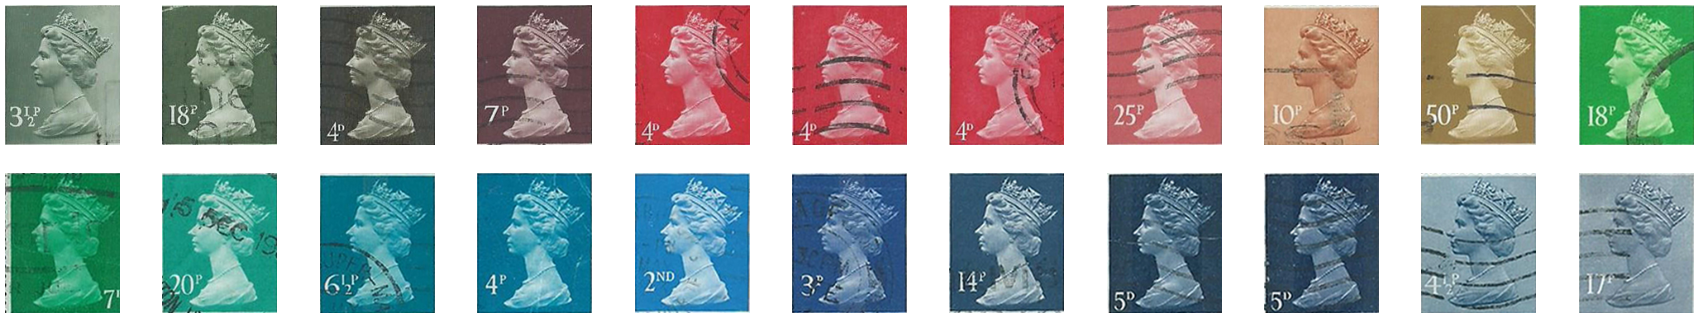

In [ ]:
# Visualize the data in a grid:
def plot_data(data):
    m = 2
    n = len(data)//m
    fig, axes = plt.subplots(m, n, figsize=(2*n, 2*m))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i])
        ax.axis('off')
    plt.show()

plot_data(ims)

Next, we reshape the data so that each image is represented as a long, $m\times{n}\times{p}$ column. We center the data about the mean image, and compute the SVD.

In [ ]:
# Reshape the data to m*n*p by N:
S = ims.reshape(N, m*n*p).T

# Compute the mean over all columns.
# even though it is a vector, keep it two-dimensional.
Sm = np.mean(S, axis=1, keepdims=True)

# Perform a reduced SVD on the centered matrix.
A = S - Sm
U, s, Vt = np.linalg.svd(A, full_matrices=False)

Finally, we can pick a sample image to reconstruct up to a desired rank. Provided the images are well-aligned, due to their high similarity we expect only a few singular vectors are needed for a faithful reconstruction.

Notice since we are reconstructing just a single column instead of the whole dataset, we can simply pick out the correct entry of each $v_i^T$ corresponding to our chosen image, instead of constructing the full rank-one matrices $\sigma_iu_iv_i^T$.

In [ ]:
# Pick an image index and reconstruct it up to rank r.
index = 13
r = 1
Ar = np.sum([s[i]*U[:, i]*Vt[i, index] for i in range(r)], axis=0)

# Add back the mean and reshape into m by n by p.
Ar += Sm.ravel()
imr = Ar.reshape(m, n, p)

Let's visualize our reconstructed image:

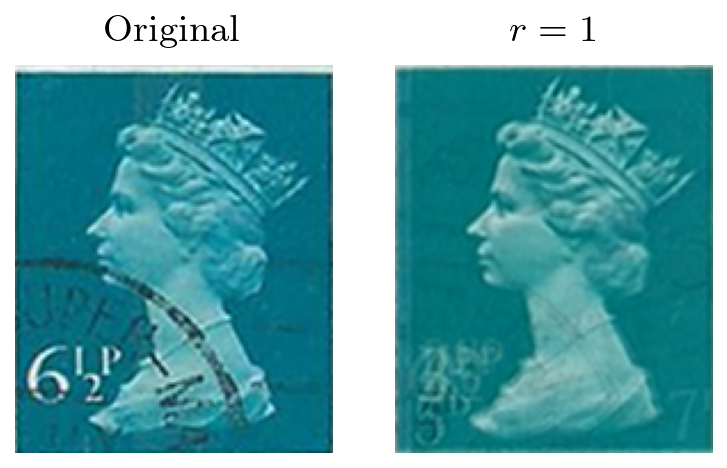

In [ ]:
# Truncate to valid range.
imr[imr < 0] = 0
imr[imr > 1] = 1

# Plot the original and compressed images.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3, 2), dpi=300)
ax1.imshow(ims[index])
ax1.set_title("Original", size=9)
ax1.axis("off")

ax2.imshow(imr)
ax2.set_title("$r={:d}$".format(r), size=9)
ax2.axis("off")

# plt.savefig("results/svd_denoising_1.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Recall that an equivalent view of the low-rank approximation is that it represents a projection of the data onto a limited number of singular vectors. The size of the projections $u_1^Ta_i$, $u_2^Ta_i$ of an image $a_i$ (column of $A$) can be considered as coordinates in the two-dimensional space spanned by the first two singular vectors, $u_1$, $u_2$.

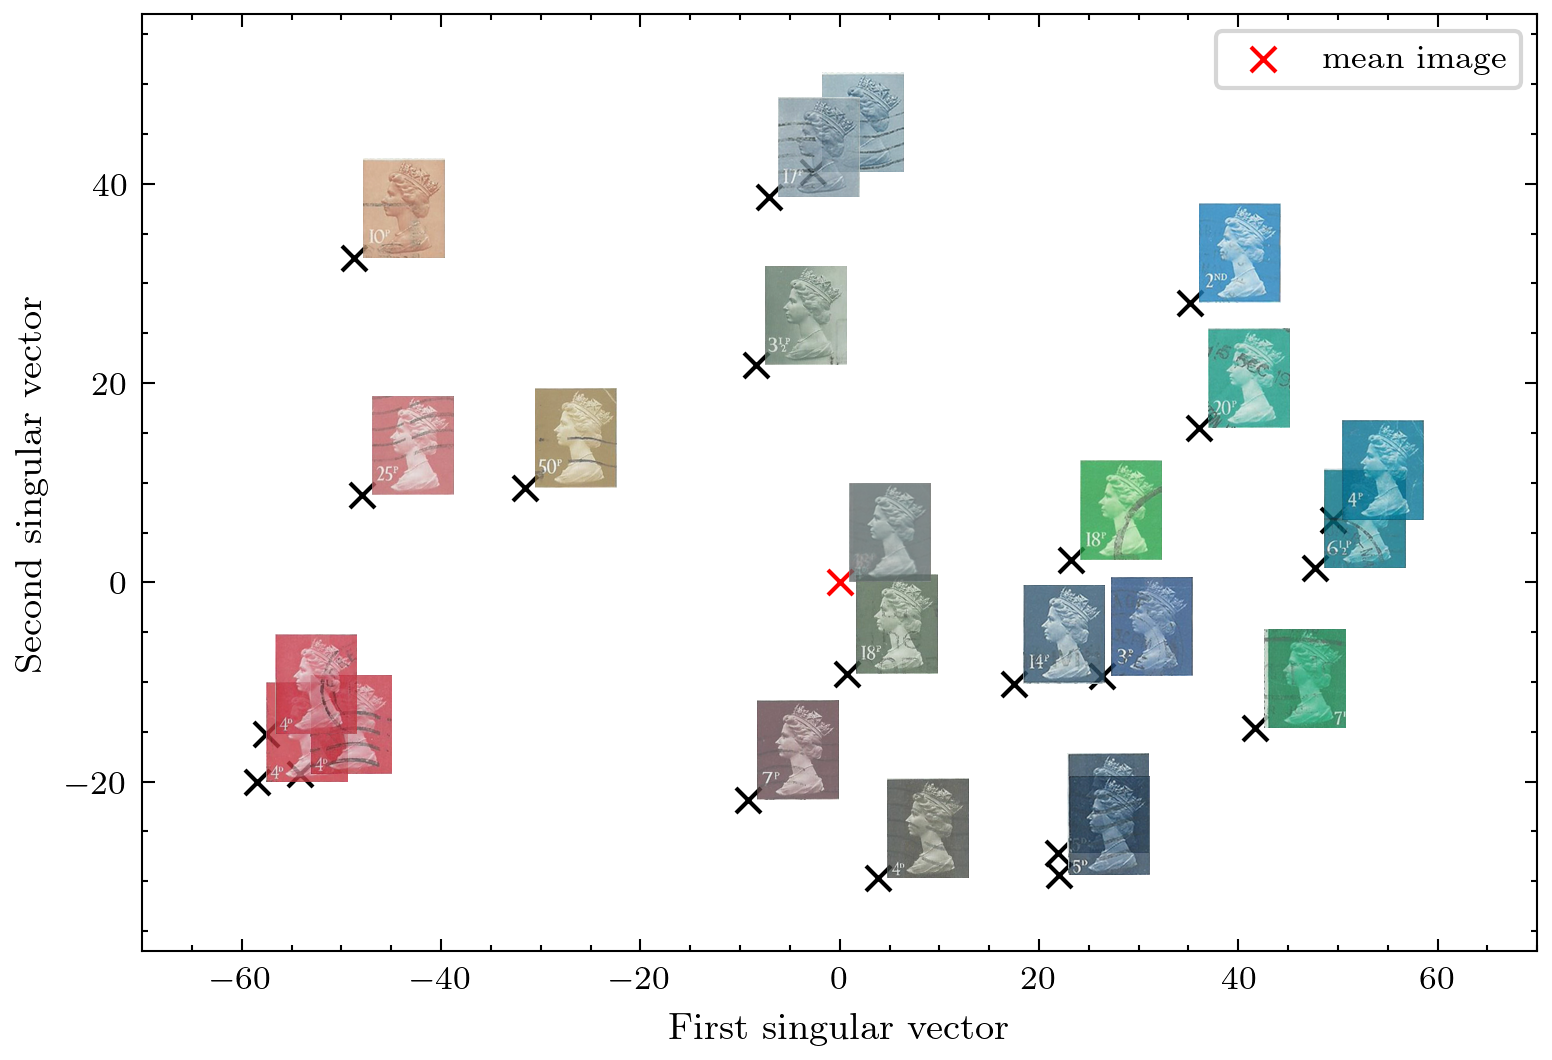

In [ ]:
# compute the 2-D coordinates of each image in the space spanned by the first
# two singular vectors.
coords = np.dot(U[:, :2].T, A)

fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=300)
ax.scatter(coords[0], coords[1], color='k', marker='x')
# plot each image at its corresponding location
for i in range(N):
    axin = ax.inset_axes(
        [coords[0, i], coords[1, i], 10, 10], transform=ax.transData)
    axin.imshow(ims[i], alpha=0.8)
    axin.axis('off')

# also plot the mean, which lies at the origin.
ax.scatter(0, 0, color='r', marker='x', label='mean image')
axin = ax.inset_axes([0, 0, 10, 10], transform=ax.transData)
axin.imshow(Sm.reshape(m, n, p), alpha=0.8)
axin.axis('off')

ax.set_xlabel('First singular vector', size=9)
ax.set_ylabel('Second singular vector', size=9)
ax.set_xlim(-70, 70)
ax.set_ylim(-37, 57)
ax.set_aspect('equal', adjustable='box')
ax.tick_params(labelsize=8)
ax.legend(fontsize=8, frameon=True)

# plt.savefig("results/svd_denoising_space.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Do you see evidence of organization in the data after the coordinate transformation?